In [52]:
#Importing packages we need
from numpy import genfromtxt #This is used to loading a csv-file as a numpy array
import numpy as np
import scipy.optimize as opt #used to numerically optimize
import matplotlib.pyplot as plt #pyplot is used to plot the data
import pandas as pd
from matplotlib import cm

In [53]:
#Loading data (here we use the data we simulated in our earlier script)

#Locate my folder -insert your own folder here (remember Python dont understand spaces so use underscore '_')
my_folder='C:/Users/xxx'
x_val = genfromtxt(my_folder+'ARCH1sim.csv', delimiter=',') #loading the csv data and storing it as a np array

In [54]:
def ARCH11_filter(omega, alpha,x_values): #function to find sigma^2 from observations
    T=len(x_values)
    
    #Define the series sigma^2_t (sigma2) as empty variables we assign values to later. 
    sigma2=np.empty(T)
    
    sigma2[0]=1
    
    for t in range(1,T):
        sigma2[t]=omega + alpha*x_values[t-1]**2
    
    return sigma2

def ARCH11_likelihood(omega,alpha):
    
    sigma2=ARCH11_filter(omega, alpha, x_val)
    
    LogL=np.sum(-np.log(sigma2)-x_val**2/sigma2) #Constants have been removed from the expression
    
    return LogL

In [55]:
grid_alp=np.array([0.1,0.3,0.35,0.4,0.5,0.9,1.5,3]) #defining the grid
n=len(grid_alp) #length of grid
log_values=np.zeros(n) #the number of values above

In [56]:
omega=1
for i in range(n):
    log_values[i]=ARCH11_likelihood(omega,grid_alp[i])

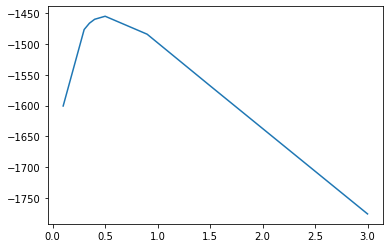

In [57]:
plt.plot(grid_alp,log_values)